In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns

In [13]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [14]:
X

array([[-0.3419657 ,  0.1731895 ],
       [ 0.47908691,  1.0859321 ],
       [ 0.46369001, -0.44304937],
       ...,
       [ 0.83758696,  0.63381552],
       [-0.06853343,  1.05220193],
       [-0.76067803,  0.91786583]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

<Axes: xlabel='0', ylabel='1'>

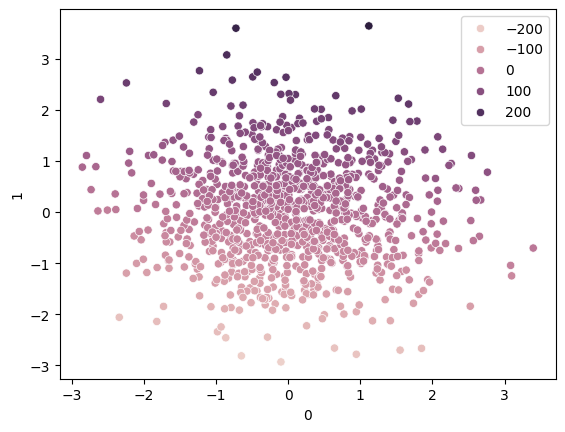

In [17]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [18]:
from sklearn.svm import SVR

In [19]:
svr=SVR(kernel='linear')

In [20]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [21]:
y_pred=svr.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))




0.9979463917194525


Hyper parameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameter={
    'C': [1,2,3,5,10,100],
    'gamma':[1,0.1,0.01],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3],
}

In [31]:
grid=GridSearchCV(SVR(),param_grid=parameter,cv=5,refit=True,verbose=3)

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 5, 10, 100], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['linear']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [34]:
y_pred=grid.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9980479485045312
